In [155]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
df = pd.read_csv("./loan_data_modified2.csv")
df.head()  # muestra 5 por defecto

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,home_ownership,grade,outcome,emp_length,emp_len_,borrower_score
0,Charged Off,2500,f,12000,16.30,7.77800,4853,42.2,OWN,6.6,default,0,f,0.40
1,Charged Off,1000,f,18408,6.00,2.24902,2510,83.7,RENT,4.6,default,0,f,0.35
2,Charged Off,1700,f,37800,27.00,1.68889,16333,91.2,MORTGAGE,6.8,default,0,f,0.25
3,Charged Off,8575,f,32000,22.54,11.55790,20142,89.9,MORTGAGE,3.8,default,0,f,0.55
4,Charged Off,14125,f,45696,21.93,12.39500,15831,91.5,MORTGAGE,5.8,default,0,f,0.30


In [10]:
df.columns

Index(['status', 'loan_amnt', 'term', 'annual_inc', 'dti', 'payment_inc_ratio',
       'revol_bal', 'revol_util', 'home_ownership', 'grade', 'outcome',
       'emp_length', 'emp_len_', 'borrower_score'],
      dtype='object')

In [129]:
# definimos nuestros predictores y nuestros outcome
predictor = [ 'loan_amnt', 'annual_inc', 'dti', 'payment_inc_ratio','revol_bal', 'revol_util', 'grade','emp_length', 'borrower_score']
outcome = 'outcome'

In [130]:
X = df[predictor]
Y = df[outcome]

In [131]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))  # estandarizamos los datos numericos

In [86]:
aux = df['emp_len_']

In [90]:
aux[aux == 'f'] = False

/tmp/ipykernel_3206/1540016850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 'f'] = False


In [92]:
aux[aux == 't'] = True

/tmp/ipykernel_3206/350803457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 't'] = True


In [94]:
aux = aux.astype(bool)

In [96]:
df['emp_len_'] = aux

In [99]:
aux = df['term']

In [100]:
aux[aux == 'f'] = False

/tmp/ipykernel_3206/1540016850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 'f'] = False


In [101]:
aux[aux == 't'] = True

/tmp/ipykernel_3206/350803457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux == 't'] = True


In [102]:
aux = aux.astype(bool)

In [105]:
df['term'] = aux

In [106]:
df

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,home_ownership,grade,outcome,emp_length,emp_len_,borrower_score
0,Charged Off,2500,False,12000,16.30,7.77800,4853,42.2,OWN,6.6,default,0,False,0.40
1,Charged Off,1000,False,18408,6.00,2.24902,2510,83.7,RENT,4.6,default,0,False,0.35
2,Charged Off,1700,False,37800,27.00,1.68889,16333,91.2,MORTGAGE,6.8,default,0,False,0.25
3,Charged Off,8575,False,32000,22.54,11.55790,20142,89.9,MORTGAGE,3.8,default,0,False,0.55
4,Charged Off,14125,False,45696,21.93,12.39500,15831,91.5,MORTGAGE,5.8,default,0,False,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,Fully Paid,21000,False,86666,24.08,10.58380,24895,61.3,RENT,3.4,paid off,7,True,0.55
45338,Fully Paid,8000,False,72000,18.97,4.57850,9725,58.2,RENT,4.2,paid off,8,True,0.35
45339,Fully Paid,2000,False,25200,13.24,3.20333,4925,40.7,MORTGAGE,4.2,paid off,3,True,0.50
45340,Fully Paid,4375,False,20000,7.95,9.98460,6574,73.0,MORTGAGE,2.4,paid off,1,True,0.55


In [115]:
X

array([[-1.31728848e+00, -9.99525084e-01,  2.18924314e-02, ...,
         1.35283375e+00, -1.68439656e+00, -7.69364349e-01],
       [-1.50273823e+00, -8.85581596e-01, -1.33429911e+00, ...,
         6.17327864e-04, -1.68439656e+00, -1.15790693e+00],
       [-1.41619501e+00, -5.40763848e-01,  1.43075161e+00, ...,
         1.48805540e+00, -1.68439656e+00, -1.93499208e+00],
       ...,
       [-1.37910506e+00, -7.64810033e-01, -3.81014959e-01, ...,
        -2.69825957e-01, -8.84982278e-01,  7.72080771e-03],
       [-1.08547629e+00, -8.57273538e-01, -1.07754440e+00, ...,
        -1.48682074e+00, -1.41792513e+00,  3.96263386e-01],
       [-6.37306052e-01, -3.59393127e-01,  1.41890139e+00, ...,
         4.06282255e-01, -1.41792513e+00,  1.17334854e+00]])

In [135]:
Y

0         default
1         default
2         default
3         default
4         default
           ...   
45337    paid off
45338    paid off
45339    paid off
45340    paid off
45341    paid off
Name: outcome, Length: 45342, dtype: object

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=4,test_size=0.2)

In [133]:
K = 10
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
f= metrics.accuracy_score(y_test,y_hat)

In [134]:
f

0.6280736575146102

In [136]:
K = 20
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
f= metrics.accuracy_score(y_test,y_hat)

In [137]:
f

0.6372257139706693

In [138]:
K = 90
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.6516705259675819

In [139]:
K = 200
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.6505678685632375

In [162]:
Ks = 10
mean_array = np.zeros((Ks))
for n in range(1,Ks+1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    mean_array[n - 1] = metrics.accuracy_score(y_test,y_hat)

In [163]:
mean_array

array([0.57007388, 0.57834381, 0.59697872, 0.59819164, 0.60646157,
       0.6105414 , 0.61693682, 0.62200904, 0.62785313, 0.62807366])

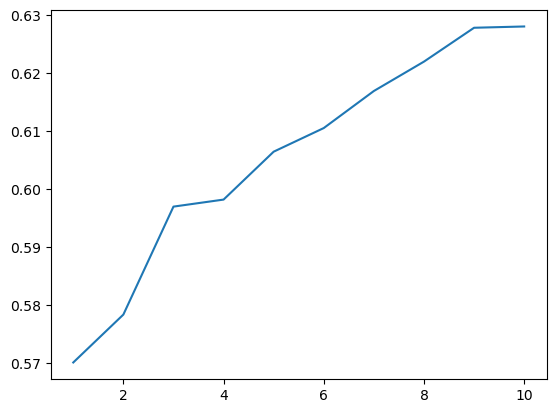

In [165]:
plt.plot(range(1,Ks+1),mean_array)
plt.show()